### Logistic Regression from Scratch

Logistic Regression is a Supervised Machine Learning algorithm that we use to predict the Categorical variable, it can be used for Multi-class Classification purpose as well but mostly Practitioners use it for Binary Classification.

Logisitic Regression gives us the probability of happening of an event, and the probability lies between 0 and 1. So, in general scenario if the outcome of Logistic Regression is greater than 0.5, we consider the event to happend and vice versa.
In Banking Industry, one of the usage of logistic regression is to develop score cards of their customers.

Cost Function:
$$
Cost(h_x, y) = -[y . log(h_x) + (1-y).log(1-h_x)]   
$$


Sigmoid Function:
$$
\frac{1}{(1 + e^{-z})}
$$

In [1]:
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
%matplotlib inline

We use the Wine Dataset available in sklearn to import

In [59]:
dataset = load_wine()

In [60]:
df = pd.DataFrame(dataset.data)

In [61]:
df["target"] = dataset.target

In [62]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [63]:
df["target"].value_counts() # Here we have 3 classes to predict but we will take only 0 and 1 for our testing

1    71
0    59
2    48
Name: target, dtype: int64

In [64]:
df.info() # Check for Missing Values and Categorical Variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  target  178 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


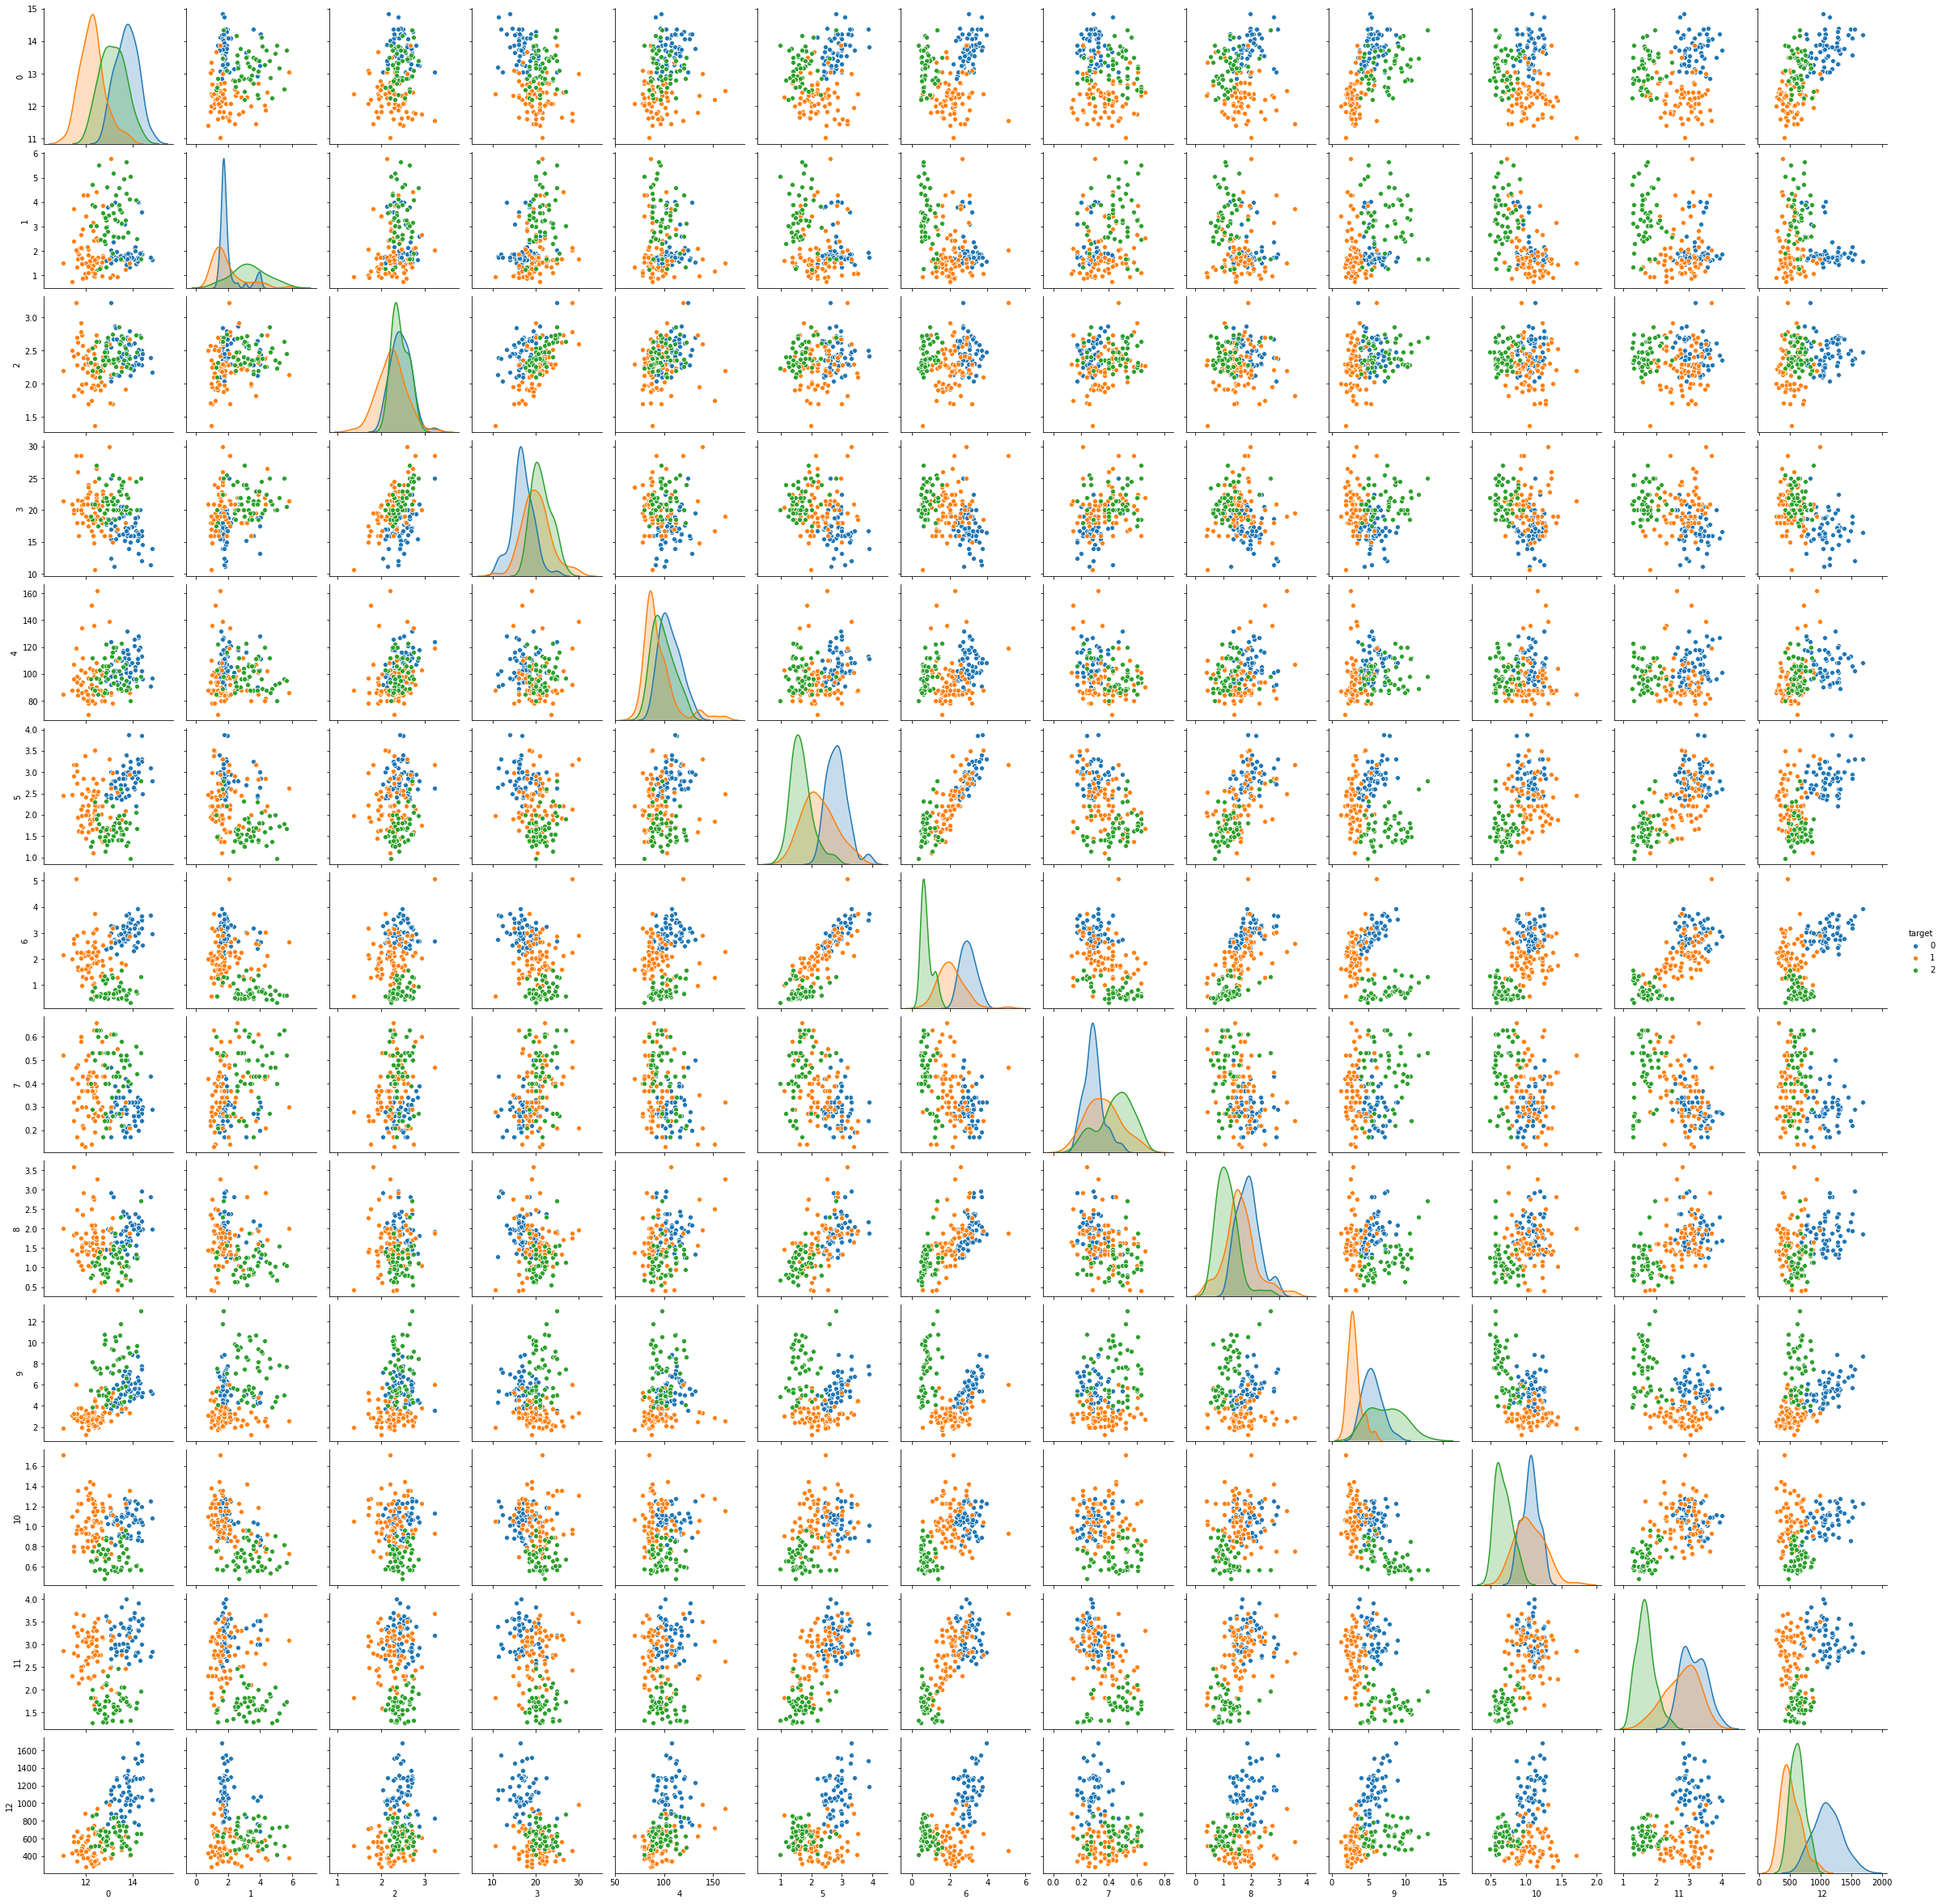

In [8]:
sns.pairplot(df, hue  = "target")

In [65]:
df = df[df["target"] <= 1] # Extract dataset with only 0 and 1 target values 

In [66]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [67]:
df = df[[0,1,3,5,6,7,8,"target"]] # we use only few variables for faster computing

In [68]:
df.head()

,0,1,3,5,6,7,8,target
0,14.23,1.71,15.6,2.80,3.06,0.28,2.29,0
1,13.20,1.78,11.2,2.65,2.76,0.26,1.28,0
2,13.16,2.36,18.6,2.80,3.24,0.30,2.81,0
3,14.37,1.95,16.8,3.85,3.49,0.24,2.18,0
4,13.24,2.59,21.0,2.80,2.69,0.39,1.82,0


In [69]:
# Sigmoid Function
def sigmoid(x, weights):
    hx = np.dot(x, weights)
    return 1/(1 + np.exp(-hx))

In [70]:
# Cost Function
def cost_function(hx, y):
    return np.sum(-(y*np.log(hx) + (1-y)*np.log(1-y)))/len(y)

In [71]:
# Gradient Function
def gradient_func(y, hx, x):
    return np.dot((y - hx), x)/len(y)

In [72]:
# Updating Weight using Gradient Steps
def update_parameters( weights, gradients, learning_rate = 0.01):
    weights +=  learning_rate * gradients
    return weights

In [73]:
#Setting up X and Y
X = df.drop("target", axis =1)
y = df["target"]

In [78]:
weights = np.random.randn(7)*0.01     #Initiating weights randomly, we can change dimensions as per the no.of features
for i in range(1000):               #Looping for 1000 Iterations
    hx = sigmoid(X, weights)       
    grads = gradient_func(y, hx, X)
    weights = update_parameters(weights, grads)

ys_pred = []
for i in sigmoid(X, weights):      #Predicting using threshold of 0.5
    if i < 0.5:
        ys_pred.append(0)
    else:
        ys_pred.append(1)

In [79]:
df["pred"] = ys_pred

In [80]:
confusion_matrix(y, ys_pred)

array([[51,  8],
       [ 8, 63]], dtype=int64)

#### Now we will use SkLearn Logistic Regression to compare our results

In [77]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

In [57]:
confusion_matrix(y, clf.predict(X))

array([[56,  3],
       [ 4, 67]], dtype=int64)

Though results from sklearn are better than what we obtained with our model, reason for this is because Sklearn uses many optimizers to find optimal solution 